In [1]:
import cv2
import numpy
from PIL import Image
#image = cv2.imread('C:\d drive\design credit\pytorch implementation of heat mapping\image dataset\imagenet-sample-images\n01496331_electric_ray.JPEG')
image = Image.open(r"C:\d drive\design credit\LRP_vgg19\castle3.jpg")
img_rsz = image.resize((224,224))
img = numpy.array(img_rsz)[...,::-1]/255.0


In [2]:
img.shape

(224, 224, 3)

In [3]:
import torch

mean = torch.Tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
std  = torch.Tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)

X = (torch.FloatTensor(img[numpy.newaxis].transpose([0,3,1,2])*1) - mean) / std


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


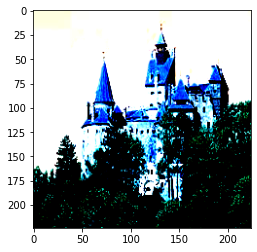

In [4]:
import matplotlib.pyplot as plt
import torchvision
plt.imshow(torchvision.utils.make_grid(X, nrow=1).permute(1, 2, 0))

In [5]:
print (X)

tensor([[[[ 1.6838,  1.6838,  1.6838,  ...,  1.6495,  1.6495,  1.6495],
          [ 1.6838,  1.6838,  1.6838,  ...,  1.6495,  1.6495,  1.6495],
          [ 1.6838,  1.6838,  1.6838,  ...,  1.6667,  1.6667,  1.6667],
          ...,
          [-1.3815, -1.9295, -2.0152,  ..., -2.1179, -1.9124, -1.8610],
          [-1.3302, -1.6384, -1.6898,  ..., -2.0837, -1.7069, -1.6898],
          [-0.9877, -1.0733, -1.1589,  ..., -2.0152, -1.4329, -1.3987]],

         [[ 1.2381,  1.2381,  1.2381,  ...,  1.2731,  1.2731,  1.2731],
          [ 1.2381,  1.2381,  1.2381,  ...,  1.2731,  1.2731,  1.2731],
          [ 1.2381,  1.2381,  1.2381,  ...,  1.2906,  1.2906,  1.2906],
          ...,
          [-0.4076, -0.9678, -1.0728,  ..., -1.0903, -0.8102, -0.7052],
          [-0.3550, -0.6877, -0.7402,  ..., -0.9853, -0.4951, -0.4776],
          [-0.0049, -0.1099, -0.2150,  ..., -0.8803, -0.1975, -0.1625]],

         [[ 0.8797,  0.8797,  0.8797,  ...,  0.9319,  0.9145,  0.9145],
          [ 0.8797,  0.8797,  

In [6]:
print(mean.shape)

torch.Size([1, 3, 1, 1])


In [7]:
print (mean)

tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]])


In [8]:
print (X)

tensor([[[[ 1.6838,  1.6838,  1.6838,  ...,  1.6495,  1.6495,  1.6495],
          [ 1.6838,  1.6838,  1.6838,  ...,  1.6495,  1.6495,  1.6495],
          [ 1.6838,  1.6838,  1.6838,  ...,  1.6667,  1.6667,  1.6667],
          ...,
          [-1.3815, -1.9295, -2.0152,  ..., -2.1179, -1.9124, -1.8610],
          [-1.3302, -1.6384, -1.6898,  ..., -2.0837, -1.7069, -1.6898],
          [-0.9877, -1.0733, -1.1589,  ..., -2.0152, -1.4329, -1.3987]],

         [[ 1.2381,  1.2381,  1.2381,  ...,  1.2731,  1.2731,  1.2731],
          [ 1.2381,  1.2381,  1.2381,  ...,  1.2731,  1.2731,  1.2731],
          [ 1.2381,  1.2381,  1.2381,  ...,  1.2906,  1.2906,  1.2906],
          ...,
          [-0.4076, -0.9678, -1.0728,  ..., -1.0903, -0.8102, -0.7052],
          [-0.3550, -0.6877, -0.7402,  ..., -0.9853, -0.4951, -0.4776],
          [-0.0049, -0.1099, -0.2150,  ..., -0.8803, -0.1975, -0.1625]],

         [[ 0.8797,  0.8797,  0.8797,  ...,  0.9319,  0.9145,  0.9145],
          [ 0.8797,  0.8797,  

In [9]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [10]:
import torchvision
import utils
model = torchvision.models.vgg16(pretrained=True); model.eval()
layers = list(model._modules['features']) + utils.toconv(list(model._modules['classifier']))
L = len(layers)


In [11]:
model._modules['features']

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [12]:
model._modules['classifier']

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [13]:
layers

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(512, 512, kernel_size=(3, 3), stride=(1

In [14]:
A = [X]+[None]*L
for l in range(L): A[l+1] = layers[l].forward(A[l])


In [15]:
print(len(A[-1][0]))

1000


In [16]:
scores = numpy.array(A[-1].data.view(-1))
ind = numpy.argsort(-scores)
for i in ind[:10]:
    print('%20s (%3d): %6.3f'%(utils.imgclasses[i][:20],i,scores[i]))


              castle (483): 16.159
           monastery (663): 12.662
              palace (698): 11.470
church, church build (497): 10.867
         stupa, tope (832):  9.110
       space shuttle (812):  9.047
beacon, lighthouse,  (437):  8.588
              mosque (668):  8.502
 bell cote, bell cot (442):  8.089
                 alp (970):  7.974


In [17]:
print (ind)

[483 663 698 497 832 812 437 668 442 970 538 646 979 562 975 972 976 807
 657 912 755 984 723 973 978 557 417 645 895 409 716 682 847 858 188 500
 825 744 517 724 425 405 599 449 628 872 611 708 406 873 884 706 649 660
 586 974 913 727 835 471 892 814 743 937 448 701 900 958 995 460 525 576
 982 407 672 863 494 730 404 664 484 115 703 627 871 839 694 428 353 580
 690 757 540 403 862 762 326 189 653 355 656 977 780 644 603 183 288 625
 667 980 506 408 293 324 805 595 921 498 864 867 476 536 400 853 914 530
 510 410 866 782 820 554 575 203 738 821 833 887 880 624  81 461 439 699
 741 621 169 919 323 851 470 289 920 524 396 325  80 345 468 350 609 888
 908 569 904 671 915 465 191  66 804  47 938 781 290 956 772 112 489 733
 652 818 272 715 331 795 883 879 472 199 734 444 991  65 336 148 413 559
 985 251 916 856 787 436 750 971 458 756 735 670 175 693 511 531 946 451
 902 574 522 321 779 352 501 421 803 459 186 505 412 906 330 127 885 829
  94 119 190 666  21 819 478 532  10  83 924 578 91

In [18]:
scores

array([-2.44148469e+00,  1.11787832e+00, -1.31766438e+00, -2.03063822e+00,
       -2.42995784e-01,  2.48404369e-01, -1.45247912e+00,  1.04077354e-01,
       -1.10703027e+00, -1.52212143e+00,  1.26916111e+00, -8.43581915e-01,
       -2.17617726e+00, -2.08722544e+00, -2.65739918e-01, -1.12050140e+00,
       -1.12026691e+00, -1.44529414e+00,  1.12684691e+00, -1.41036558e+00,
       -1.12750411e+00,  1.30543554e+00, -9.54401314e-01,  3.15344065e-01,
       -2.54726410e+00, -2.71927619e+00,  3.16708505e-01, -3.46728712e-01,
       -3.18843985e+00, -2.33133030e+00, -1.23944640e+00, -3.99732500e-01,
       -9.99932550e-03,  6.21412992e-01,  5.82261324e-01, -1.56403780e+00,
       -2.07599878e-01, -5.05821133e+00,  7.71008253e-01, -1.03348517e+00,
       -5.71553230e-01, -1.76012027e+00,  2.51904607e-01, -1.15547276e+00,
       -1.01127076e+00, -1.67237544e+00, -7.67411649e-01,  1.91333807e+00,
       -4.05291319e+00, -7.32560098e-01, -1.62245309e+00,  5.16004562e-01,
       -4.31055260e+00, -

In [19]:
T = torch.FloatTensor((1.0*(numpy.arange(1000)==ind[0]).reshape([1,1000,1,1])))

R = [None]*L + [(A[-1]*T).data]


In [20]:
for l in range(1,L)[::-1]:
    
    A[l] = (A[l].data).requires_grad_(True)

    if isinstance(layers[l],torch.nn.MaxPool2d): layers[l] = torch.nn.AvgPool2d(2)

    if isinstance(layers[l],torch.nn.Conv2d) or isinstance(layers[l],torch.nn.AvgPool2d):

        if l <= 16:       rho = lambda p: p + 0.25*p.clamp(min=0); incr = lambda z: z+1e-9
        if 17 <= l <= 30: rho = lambda p: p;                       incr = lambda z: z+1e-9+0.25*((z**2).mean()**.5).data
        if l >= 31:       rho = lambda p: p;                       incr = lambda z: z+1e-9

        # Transform weights of layer and execute forward pass
        z = incr(utils.newlayer(layers[l],rho).forward(A[l]))  # step 1
        s = (R[l+1]/z).data                                    # step 2
        (z*s).sum().backward(); c = A[l].grad                  # step 3
        R[l] = (A[l]*c).data                                   # step 4

    else:

        R[l] = R[l+1]


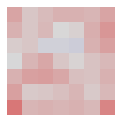

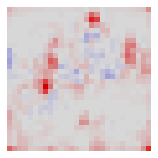

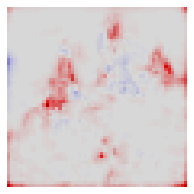

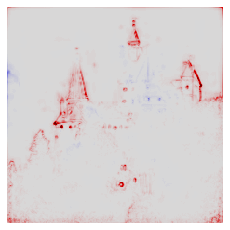

In [21]:
for i,l in enumerate([31,21,11,1]):
    utils.heatmap(numpy.array(R[l][0]).sum(axis=0),0.5*i+1.5,0.5*i+1.5)


In [22]:
A[0] = (A[0].data).requires_grad_(True)

lb = (A[0].data*0+(0-mean)/std).requires_grad_(True)
hb = (A[0].data*0+(1-mean)/std).requires_grad_(True)

z = layers[0].forward(A[0]) + 1e-9                                     # step 1 (a)
z -= utils.newlayer(layers[0],lambda p: p.clamp(min=0)).forward(lb)    # step 1 (b)
z -= utils.newlayer(layers[0],lambda p: p.clamp(max=0)).forward(hb)    # step 1 (c)
s = (R[1]/z).data                                                      # step 2
(z*s).sum().backward(); c,cp,cm = A[0].grad,lb.grad,hb.grad            # step 3
R[0] = (A[0]*c+lb*cp+hb*cm).data                                       # step 4


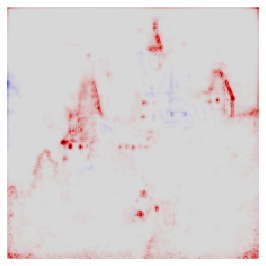

In [23]:
utils.heatmap(numpy.array(R[0][0]).sum(axis=0),3.5,3.5)